# prediction using ML

the model will be capable of prediction if someone has heart disease or not based on their medical attributes

1.Prob Def

2.Data

3.Evaluation

4.Features

5.Modelling

6.Experimentation

## 1.Prob Def
if someone has heart disease or not based on their medical attributes

##2.Data

data is taken from https://archive.ics.uci.edu/dataset/45/heart+disease
 
        
## 3.Evaluation

95% accuracy achieved we will pursue the project

## 4.Features

data dictionary
   1.  (age)       
      2.  (sex)       
      3.  (cp)        
      4.  (trestbps)  
      5. (chol)      
      6.  (fbs)       
      7. (restecg)   
      8.  (thalach)   
      9.  (exang)     
      10.  (oldpeak)   
      11. (slope)     
      12. (ca)        
      13. (thal)      
      14.  (num) 
       age: age in years
       sex: sex (1 = male; 0 = female)
        cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
       trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
       chol: serum cholestoral in mg/dl
        fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
        thalach: maximum heart rate achieved
        exang: exercise induced angina (1 = yes; 0 = no)
        slope: the slope of the peak exercise ST segment
         ca: number of major vessels (0-3) colored by flourosopy
         thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [1]:
 # importing all tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plots will appear inside the notebook
%matplotlib inline 

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df=pd.read_csv("heart-disease (1).csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

## data exploration

In [4]:
# exploratory data analysis{EDA}


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# how many of each class 
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

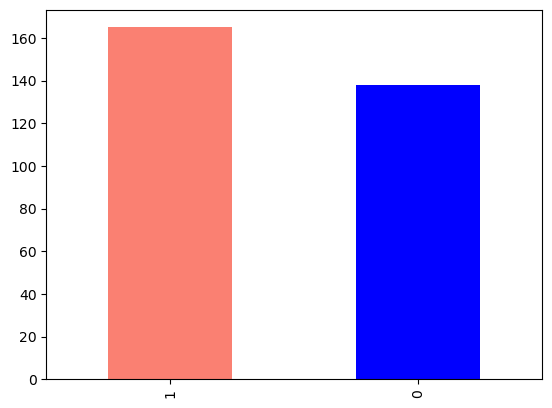

In [8]:
df["target"].value_counts().plot(kind="bar" , color=["salmon","blue"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# find missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### disease freq acc to sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
#compare target with sex
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


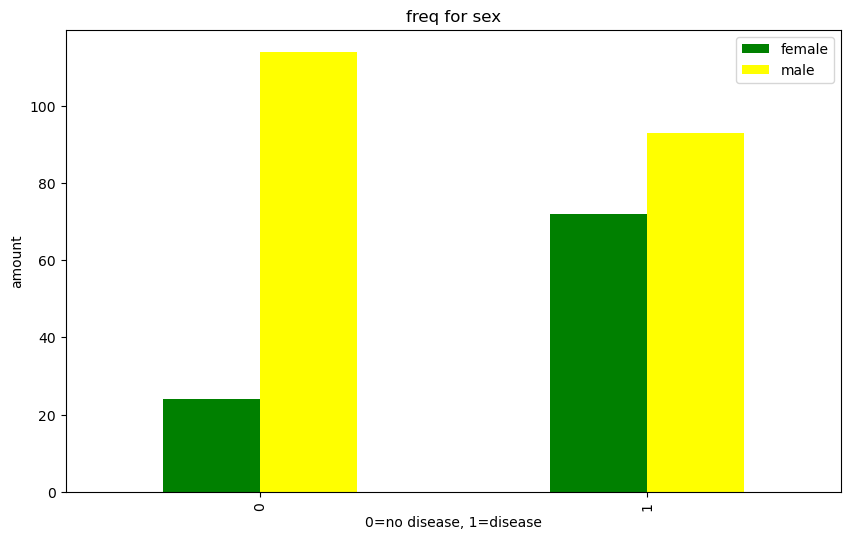

In [14]:
#create a plot
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["green","yellow"])
plt.title("freq for sex")
plt.xlabel("0=no disease, 1=disease")
plt.ylabel("amount")
plt.legend(["female","male"])


In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### age vs max heart rate

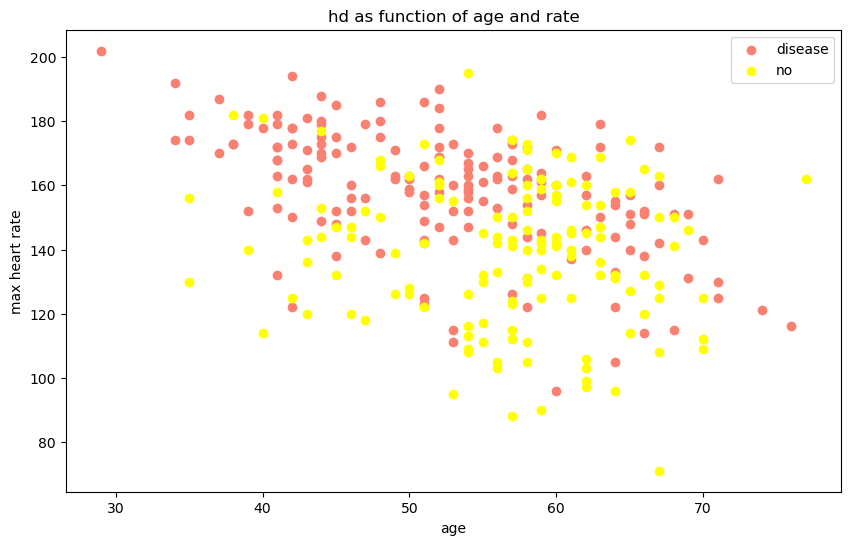

In [17]:
plt.figure(figsize=(10,6))
           # scatter with pos  eg
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="salmon")           
       # scatter with neg  eg   
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="yellow") ; 
plt.title("hd as function of age and rate")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["disease","no"])

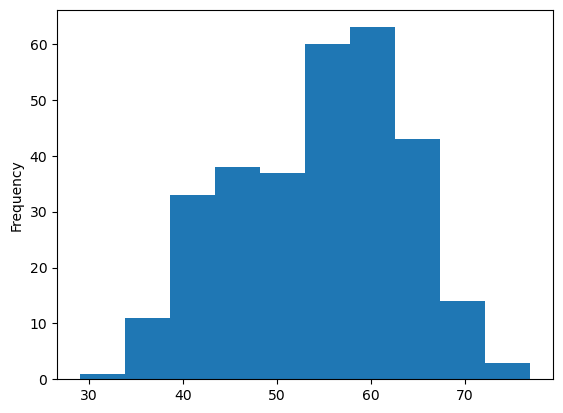

In [18]:
#check distribution with a histogram
df.age.plot.hist();

In [19]:
### disease freq for chest pain type
Value 1: typical angina 
Value 2: atypical angina 
Value 3: non-anginal pain 
Value 4: asymptomatic trestbps: resting blood pressure (in mm Hg on admission to the hospital)

SyntaxError: invalid syntax (2980579003.py, line 2)

In [20]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


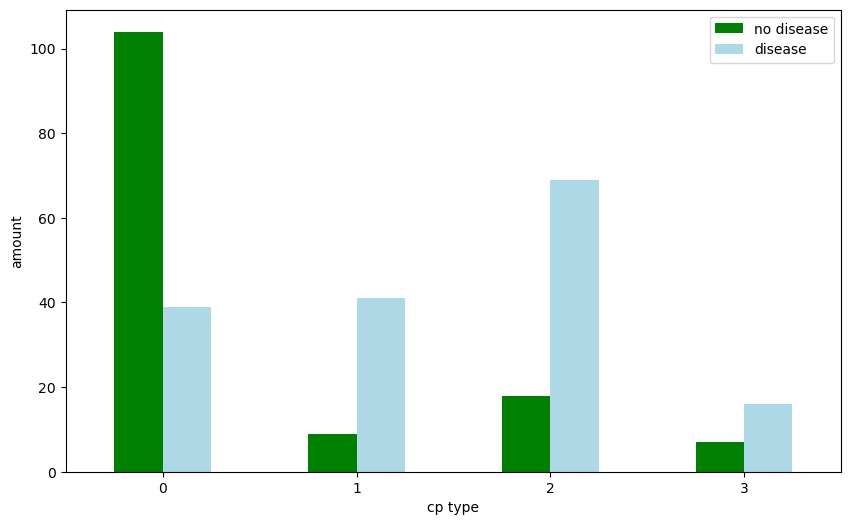

In [21]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["green","lightblue"])

plt.xlabel("cp type")
plt.ylabel("amount")
plt.legend(["no disease","disease"]);
plt.xticks(rotation=0);

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
## make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


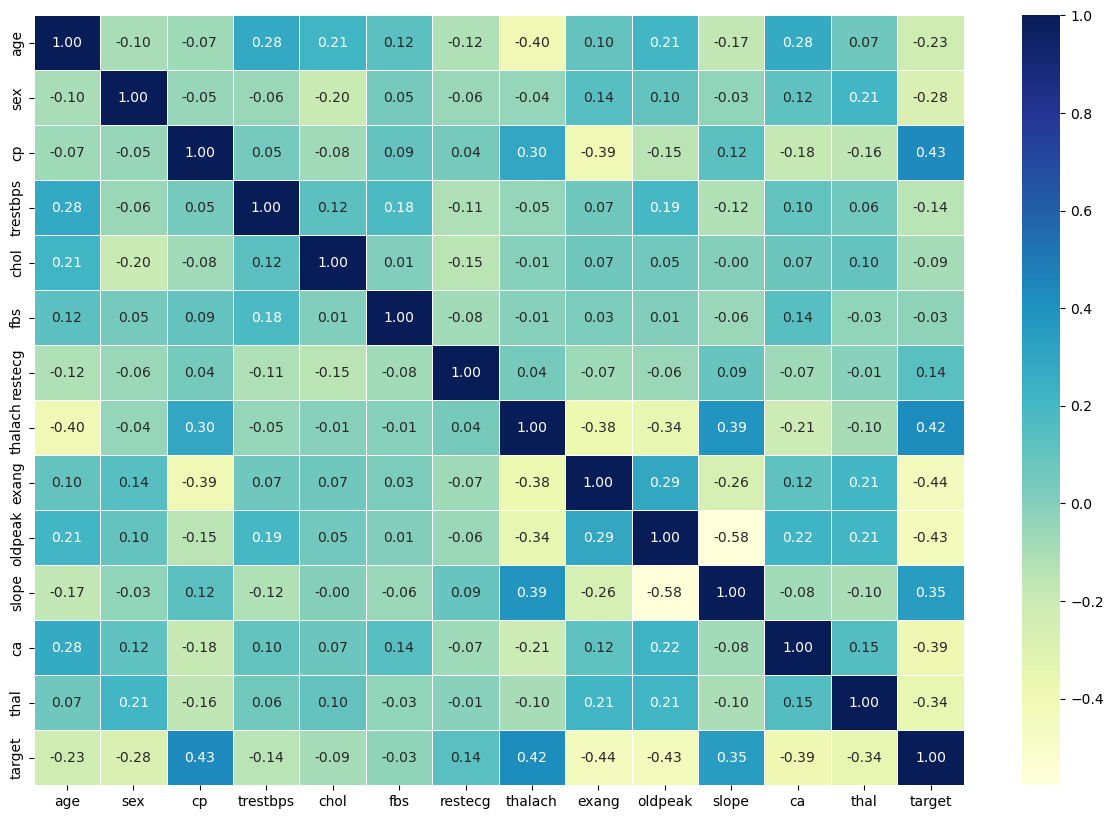

In [24]:
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

## 5.modelling

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
#split data into x and y
x=df.drop("target" , axis=1)
y=df["target"]

In [27]:
#split data into trains and test
np.random.seed(42)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

#### time to build the ml model

we will train it (find patterns) on training sets
we will test it(use patterns) on test set

three diff models
1. logistic regression

2.k nearest neighbours classification

3.random forest classifier

In [30]:
models={"Logistic Regression":LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    fits and evaluates given ml models
    """
    #set random seed
    np.random.seed(42)
    # make dict to kepp model scores
    model_scores={}
    #loop through models
    for name,model in models.items():
        #fit the model to data
        model.fit(x_train,y_train)
        #evaluate and append score to model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores    
        
        
    


In [31]:
model_scores=fit_and_score(models=models,
                          x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

C:\Users\bohid\OneDrive\Desktop\heart-disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### model comparision

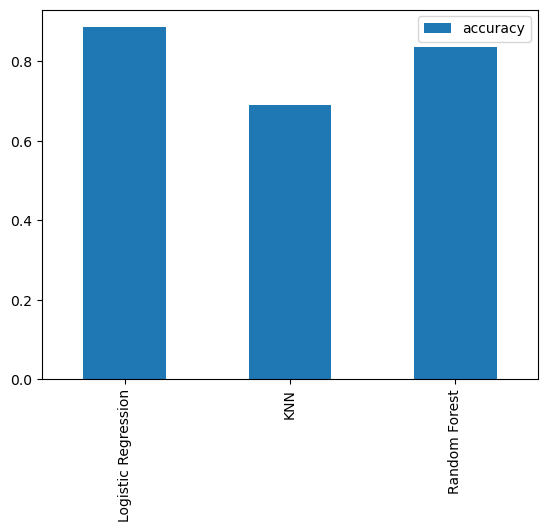

In [32]:
model_compare=pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# HYperparameter Tuning

In [89]:
# lets tune KNN
train_scores=[]
test_scores=[]

#create a list of diff values for n_neighbors
neighbors=range(1, 21)
# setup KNN instance
knn=KNeighborsClassifier()
#loop through diff n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fir the algo
    knn.fit(x_train,y_train)
    
    #update training scores list
    train_scores.append(knn.score(x_train,y_train))
    
      #update training scores list
    test_scores.append(knn.score(x_test,y_test))

In [90]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [91]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

max KNN score on test data:75.41%


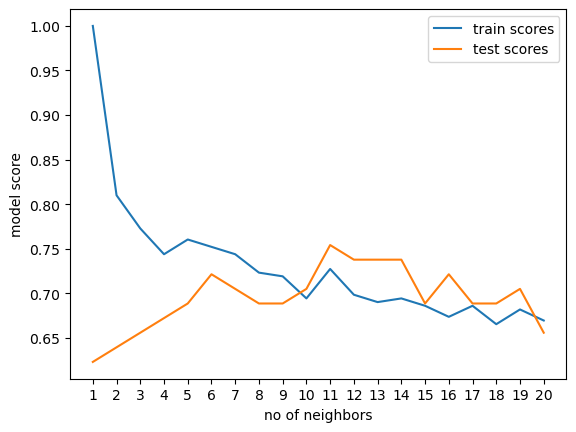

In [92]:
plt.plot(neighbors,train_scores, label="train scores")
plt.plot(neighbors,test_scores, label="test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("no of neighbors")
plt.ylabel("model score")
plt.legend()

print(f"max KNN score on test data:{max(test_scores)*100:.2f}%")

## hyperparameter tuning with RandomizedSearchCV

In [93]:
# create a hyperparameter grid for LogisticRegression
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver": ["liblinear"]}
#create a hyperparameter grid for rfc
rf_grid={"n_estimators": np.arange(10,1000,50),
        "max_depth": [None,3,5,10],
        "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2)}

In [94]:
# we have hyperparameter grids now we will tune them using randoseacrhcv

In [95]:
#tune logRegression
np.random.seed(42)

#setup random hyperparameter search for logisticregression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
# fit hyp param search model for log reg
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [96]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [97]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [100]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)
# fit hyp param search model for random forest
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [101]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [102]:
# evaluate the randomized Search RFC model score
rs_rf.score(x_test,y_test)

0.8688524590163934

In [103]:
since logistic reg model provides best scores so far we will try and improve them using GridSearchCV

SyntaxError: invalid syntax (1711278216.py, line 1)

# hyperparameter tuning using GridSearchCv

In [105]:
# diff hyperparams for our logisticRegressionmodel
log_reg_grid={"C": np.logspace(-4,4,30),
             "solver": ["liblinear"]}
#setup random hyperparameter search for logisticregression
gs_log_reg=GridSearchCV(LogisticRegression(),
                             param_grid=log_reg_grid,
                             cv=5,
                           
                             verbose=True)
# fit hyp param search model for log reg
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [106]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [108]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [109]:
## evaluating our tuned ml classifier, beyond accuracy
y_preds=gs_log_reg.predict(x_test)

In [110]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [111]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

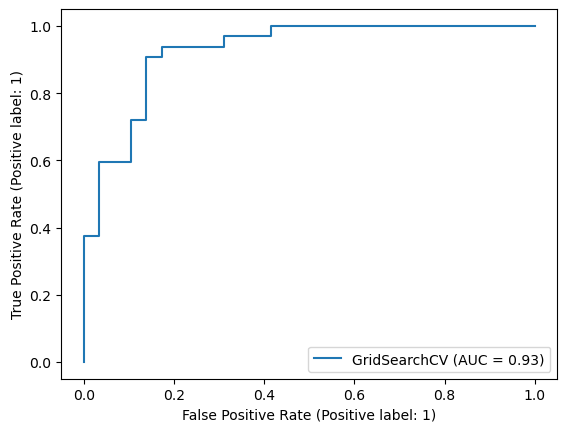

In [121]:
# plot roc curve and cal auc metric
from sklearn.metrics import RocCurveDisplay 
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)

In [122]:
# confusion matrix

print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


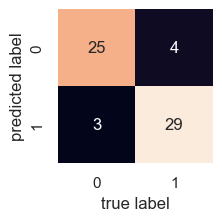

In [128]:
sns.set(font_scale=1)
def plot_conf_mat(y_test,y_preds):
    """
    plots conf matrix using seaborns's heatmap()
    """
    fig, ax =plt.subplots(figsize=(2,2))
    ax= sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
plot_conf_mat(y_test,y_preds)    
    

In [130]:
#now time for classification report,cv precision ,recall and f1 score

In [131]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [133]:
# calculate evaluation metrics using cross validation
#we will use cross_val_score()

In [135]:
#check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [137]:
#create a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418, 
                       solver= "liblinear")

In [144]:
#cross-validated accuracy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc


0.8446994535519124

In [147]:
#crross validated precision
cv_prec=cross_val_score(clf,
                      x,
                      y,
                        cv=5,
                      scoring="precision")

cv_prec=np.mean(cv_prec)
cv_prec


0.8207936507936507

In [148]:
#crross validated f1-score
cv_f1=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="f1")

cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

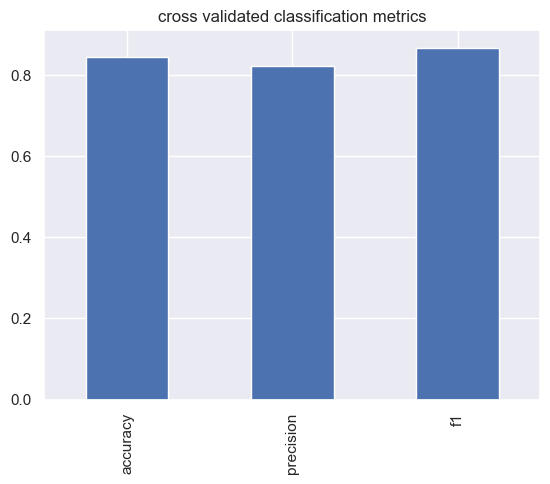

In [153]:
cv_metric=pd.DataFrame({"accuracy":cv_acc,
                       "precision":cv_prec,
                       "f1":cv_f1},
                      index=[0])
cv_metric.T.plot.bar(title="cross validated classification metrics",
                    legend=False);

# feature importance

In [154]:
#which feature contibutes the most?

In [155]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [156]:
# ft an instance of log reg
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [158]:
clf=LogisticRegression(C= 0.20433597178569418, 
                       solver= 'liblinear')
clf.fit(x_train,y_train);

In [160]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [159]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [162]:
#match coefs of features to colums
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

<Axes: title={'center': 'feature importance'}>

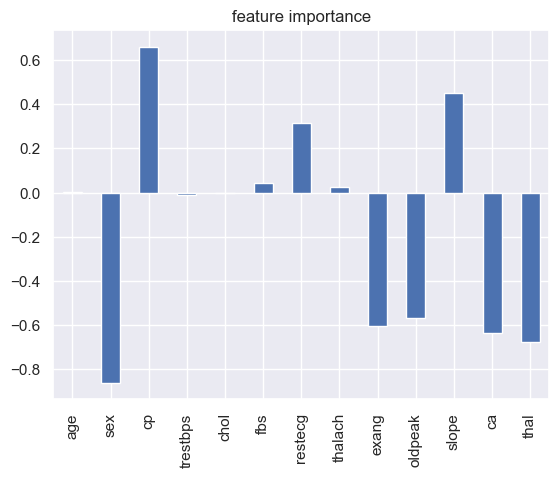

In [164]:
# visualize feature importance
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="feature importance", legend=False)